<img src="https://i.postimg.cc/jdgWdX7f/i-RIS-PROJECT.png">

<img src = "https://i.postimg.cc/NjbLPxgF/iris-hd.jpg">

# SETUP ⚙️

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #Eliminar warnings

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Automcompletar rápido
%config IPCompleter.greedy=True


/kaggle/input/iris-flower-dataset/IRIS.csv


In [3]:
datos = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
datos

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
ruta_outputs= "/kaggle/working/"
val = datos.sample(frac = 0.3)
val.shape

(45, 5)

In [5]:
trabajo = datos.loc[~datos.index.isin(val.index)]
trabajo.shape

(105, 5)

In [6]:
val.to_csv(ruta_outputs + "Validacion.csv")

In [7]:
trabajo.to_csv(ruta_outputs + "Trabajo.csv")

# CALIDAD DE DATOS 🛠️

### Informacion DataFrame

In [8]:
df = pd.read_csv(ruta_outputs + "Trabajo.csv",index_col=0)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


### Conteo de valores

In [10]:
df.species.value_counts()

species
Iris-virginica     38
Iris-setosa        35
Iris-versicolor    32
Name: count, dtype: int64

In [11]:
df.species.value_counts(normalize = True)*100

species
Iris-virginica     36.190476
Iris-setosa        33.333333
Iris-versicolor    30.476190
Name: proportion, dtype: float64

### Valores unicos

In [12]:
df.nunique().sort_values()

species          3
sepal_width     22
petal_width     22
sepal_length    32
petal_length    39
dtype: int64

### Corrección Duplicados

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop_duplicates(inplace = True)

### Separamos numéricas y catégoricas para revisar


In [15]:
cat = df.select_dtypes(exclude='number').copy()
cat

,species
0,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
...,...
144,Iris-virginica
145,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [16]:
num = df.select_dtypes(include = 'number').copy()
num

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Corrección Nulos

No tenemos nulos

In [17]:
cat.isna().sum()

species    0
dtype: int64

In [18]:
num.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

### Atipicos

### Metodo 1: Desviaciones tipicas

In [19]:
num_desv_tip = 3

In [20]:
def atipicos_desv_tip(variable, num_desv_tip = 3):
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

In [21]:
def conteo_atipicos(df,variable, num_desv_tip = 3):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts())

In [22]:
variables_num = num.columns.to_list()
variables_num

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [23]:
for i in variables_num:
    print('\n' + i + ':\n')
    print(conteo_atipicos(num,i,3))


sepal_length:

Series([], Name: count, dtype: int64)

sepal_width:

sepal_width
4.4    1
Name: count, dtype: int64

petal_length:

Series([], Name: count, dtype: int64)

petal_width:

Series([], Name: count, dtype: int64)


### Metodo 2: Colas

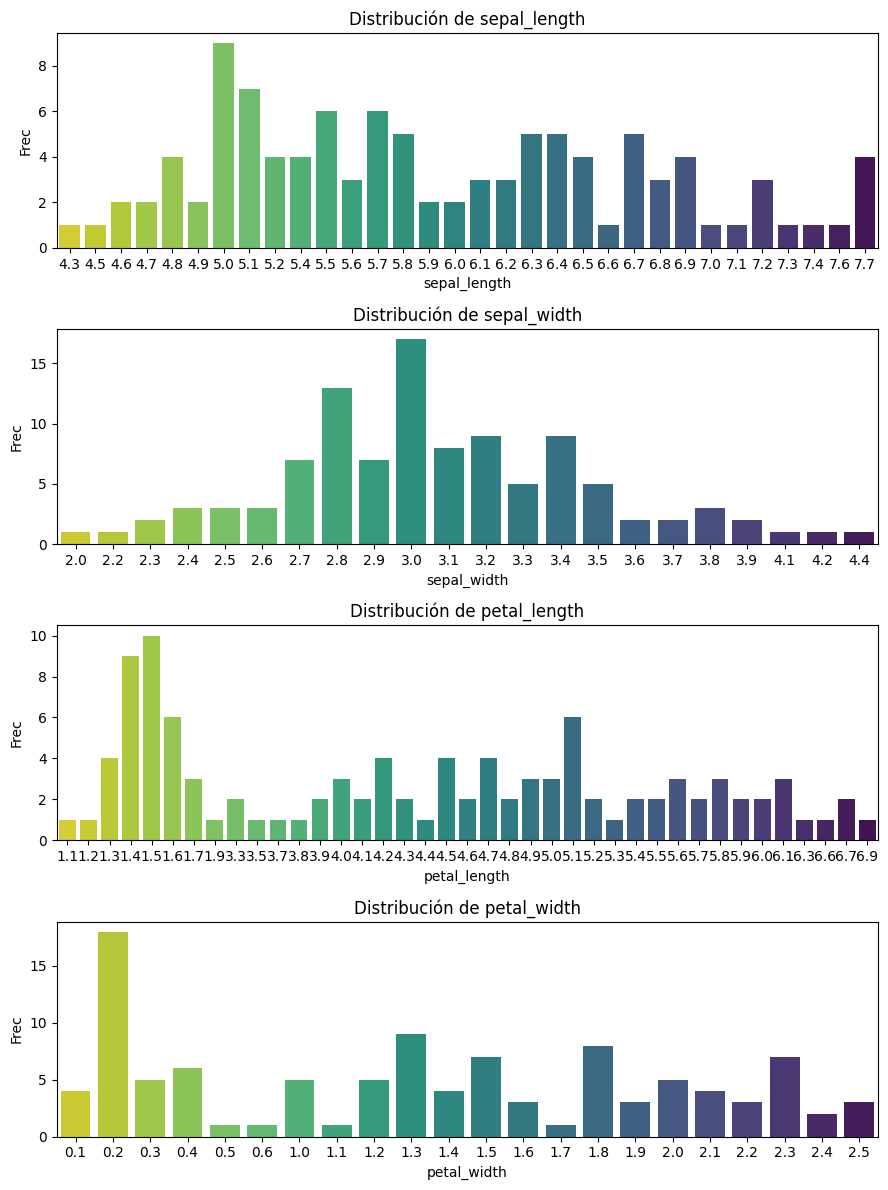

In [24]:
fig, axes = plt.subplots(4,1,figsize=(9, 12))
axes = axes.flatten()

for i ,var in enumerate(variables_num):
    ax = sns.countplot(x=df[var],data = df, palette = 'viridis_r', ax = axes[i])
    ax.set_title('Distribución de '+ var)
    ax.set_xlabel(var)
    ax.set_ylabel('Frec')
    
plt.tight_layout()
plt.show()

Viendo la distribución de frecuencias de cada variable no vemos datos atípicos como para regularizar.

### Guardado de datos

In [25]:
df.to_pickle(ruta_outputs + "trabajo_resultado_calidad_datos.pickle")
cat.to_pickle(ruta_outputs + "cat_resultado_calidad_datos.pickle")
num.to_pickle(ruta_outputs + "num_resultado_calidad_datos.pickle")

# EDA 🔬

## Análisis Estadístico

In [26]:
df.describe().T.style.background_gradient(cmap = 'Purples')

,count,mean,std,min,25%,50%,75%,max
sepal_length,105.000000,5.900952,0.852992,4.300000,5.100000,5.800000,6.500000,7.700000
sepal_width,105.000000,3.072381,0.427761,2.000000,2.800000,3.000000,3.300000,4.400000
petal_length,105.000000,3.822857,1.806785,1.100000,1.600000,4.300000,5.200000,6.900000
petal_width,105.000000,1.227619,0.781578,0.100000,0.300000,1.300000,1.900000,2.500000


* sepal_length: Tiene un rango bastante amplio (4.3 cm a 7.7 cm) y una desviación estándar relativamente alta (0.798), lo que indica que hay una variabilidad considerable en el largo del sépalo.
* sepal_width: La variabilidad es menor en comparación con el largo del sépalo, con un rango más estrecho (2.2 cm a 3.9 cm) y una desviación estándar más baja (0.396).
* petal_length: Muestra la mayor desviación estándar (1.742), indicando una alta variabilidad, con valores que varían significativamente (1.1 cm a 6.9 cm).
* petal_width: Tiene una desviación estándar de 0.763 y un rango de valores de 0.1 cm a 2.5 cm, mostrando una variabilidad intermedia entre las otras variables.

In [27]:
num.corr().style.background_gradient(cmap = 'Purples')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.132480,0.888545,0.834607
sepal_width,-0.132480,1.000000,-0.432747,-0.363814
petal_length,0.888545,-0.432747,1.000000,0.961262
petal_width,0.834607,-0.363814,0.961262,1.000000


**Diferenciamos correlaciones negativas bajas o moderadas frente a correlaciones positivas muy altas.**

* Relaciones Fuertes:

sepal_length tiene una alta correlación positiva con petal_length (0.877) y petal_width (0.819).
petal_length y petal_width tienen una correlación extremadamente alta (0.959), lo que indica que estas dos variables están muy estrechamente relacionadas.

* Relaciones Moderadas:

sepal_width tiene una correlación moderadamente negativa con petal_length (-0.430) y petal_width (-0.351).
Relaciones Débiles:

sepal_length y sepal_width tienen una correlación muy baja (-0.144).

## Análisis Visual

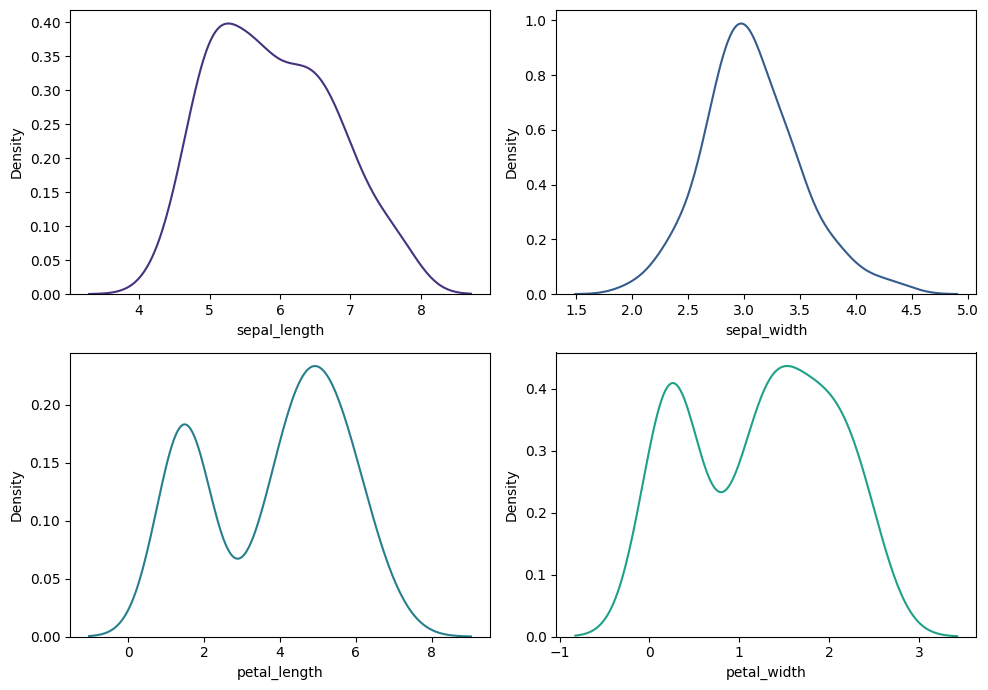

In [28]:
fig, axes = plt.subplots(2,2,figsize=(10, 7))
axes = axes.flatten()
variables_predictoras = df.columns[:-1]
palette = sns.color_palette('viridis')

for i,var in enumerate(variables_predictoras):
    ax = sns.kdeplot(data = df, x = var, color=palette[i],ax = axes[i])

plt.tight_layout()

* Sepal_lenght: 
    - Distribución Normal
* Sepal_width:
    - Distribución Unimodal
* Petal_lenght:
    - Distribución Bimodal
* Petal_width:
    - Distribución Bimodal
    
La distribución bimodal en los pétalos puede corresponder a la diferenciación entre especies, ya que algunas especies de iris tienen pétalos más largos y anchos en comparación con otras.
        
    
 

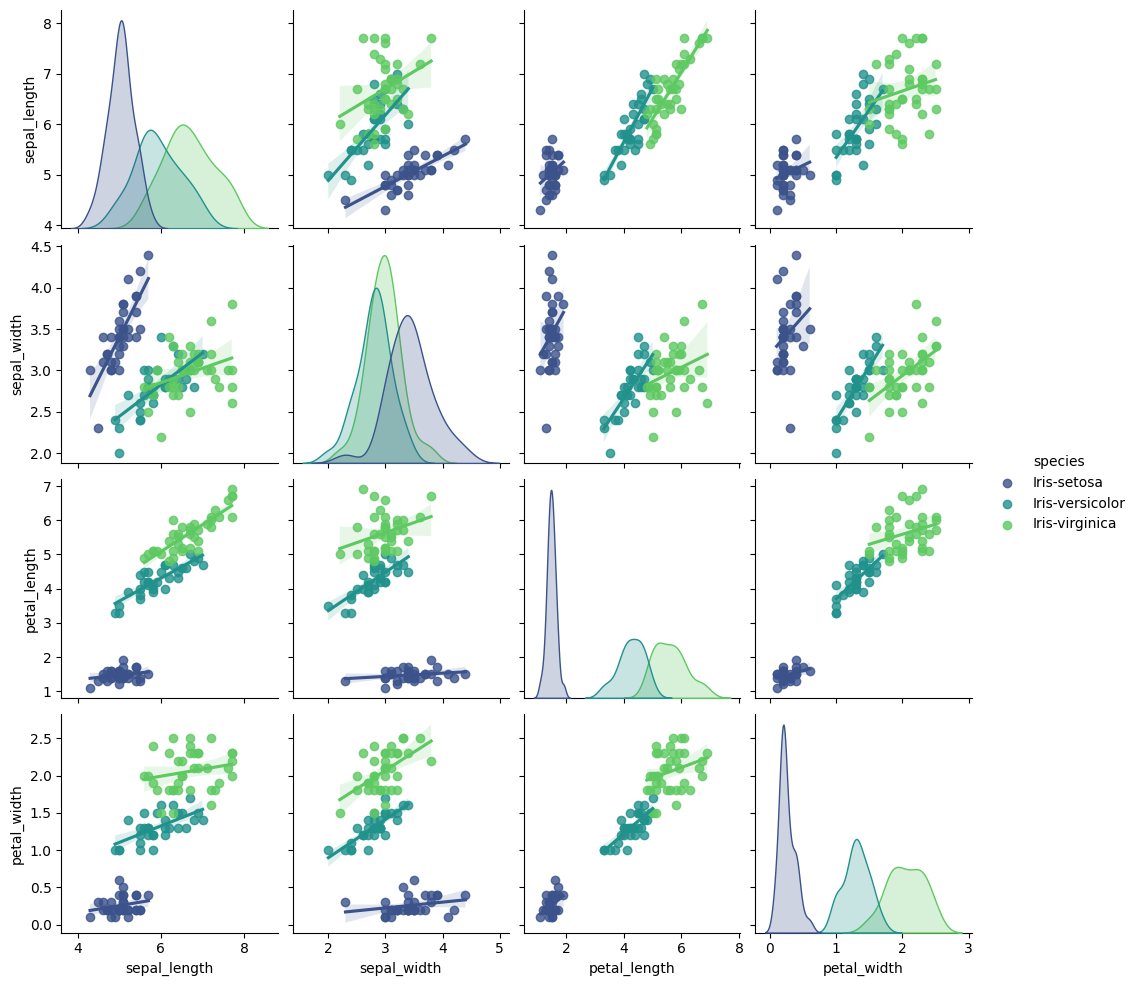

In [29]:
sns.pairplot(df,hue = 'species',kind = 'reg',palette = 'viridis');

Análisis graficos de densidad:

* Sepal length: Las tres especies tienen distribuciones superpuestas, pero Iris-setosa (en azul) tiende a tener sépalos más cortos en comparación con Iris-versicolor (en verde claro) y Iris-virginica (en verde oscuro).
* Sepal width: Iris-setosa muestra sépalos más anchos en comparación con las otras dos especies, mientras que las distribuciones de Iris-versicolor y Iris-virginica son similares.
* Petal length y Petal width: Aquí se observa una clara separación entre las especies, con Iris-setosa teniendo los pétalos más pequeños (tanto en longitud como en ancho), y Iris-virginica mostrando pétalos más largos y anchos en comparación con Iris-versicolor.

Análisis gráficos dispersión:

* Sepal length vs Sepal width: Aunque hay algo de solapamiento entre las especies, Iris-setosa forma un grupo separado con valores más bajos de longitud de sépalo y mayores valores de ancho. Iris-versicolor y Iris-virginica tienen patrones más solapados.
* Sepal length vs Petal length y Sepal length vs Petal width: Se observa una clara tendencia lineal positiva, donde Iris-setosa tiene los valores más bajos, Iris-versicolor se encuentra en el centro y Iris-virginica tiene valores más altos.
* Petal length vs Petal width: Este gráfico destaca una clara diferenciación entre las especies. Iris-setosa está claramente separada del resto, mientras que Iris-versicolor y Iris-virginica muestran cierta superposición pero aún se pueden distinguir.

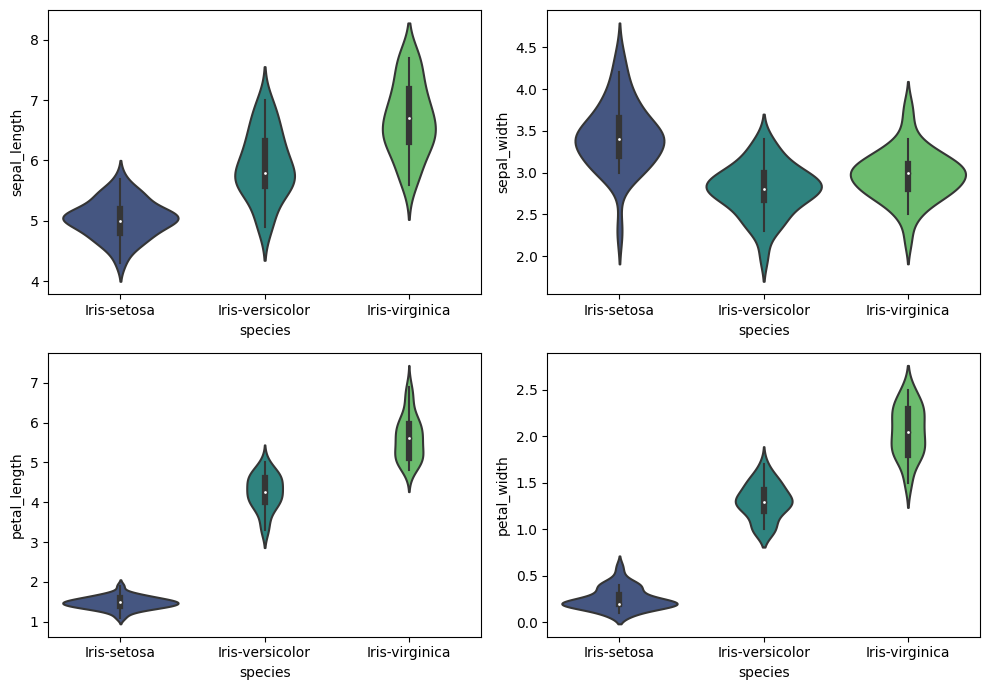

In [30]:
variables_predictoras = df.columns[:-1]
fig, axes = plt.subplots(2,2,figsize=(10, 7))
axes = axes.flatten()
#fig.patch.set_facecolor('lavender') 
for i ,var in enumerate(variables_predictoras):
    ax = sns.violinplot(data=df, x='species', y=var,palette = 'viridis', ax = axes[i], fontsize = 14)
    #ax.set_facecolor('lavender')
    #ax.set_title('Distribución de '+ var)
    ax.set_xlabel('species')
    ax.set_ylabel(var)
    
plt.tight_layout()
plt.show()

Interpretación Violinplots:

Forma del Violín: Muestra la densidad de los datos en diferentes rangos. La anchura en un punto indica la densidad de datos en ese rango; áreas más anchas indican una mayor concentración de datos.

Mediana: La línea blanca en el centro del violín representa la mediana de la variable para cada categoría.
Cuartiles: Las líneas del boxplot dentro del violín representan los cuartiles (25% y 75%).

Distribución de Datos: Puedes observar si la distribución es simétrica o sesgada, y si hay varios picos (modas) en los datos.

## Guardado de Datos

In [31]:
cat.to_pickle(ruta_outputs + "cat_resultado_EDA.pickle")
num.to_pickle(ruta_outputs + "num_resultado_EDA.pickle")

# TRANSFORMACIÓN DE DATOS ⚗️

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## Label enconding

In [33]:
from sklearn.preprocessing import LabelEncoder

#Instanciamos
le = LabelEncoder()

#Entrenamos
le.fit(cat['species'])

#Aplicamos
cat['target'] = le.transform(cat['species'])
cat

,species,target
0,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
5,Iris-setosa,0
...,...,...
144,Iris-virginica,2
145,Iris-virginica,2
147,Iris-virginica,2
148,Iris-virginica,2


In [34]:
#unificamos dataframes

df = pd.concat([num,cat],axis = 1)
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
...,...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica,2
145,6.7,3.0,5.2,2.3,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


## Reescalado de variables

In [35]:
df.iloc[:,:4].columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [36]:
#vamos a usar la técnica MinMax.

var_mms = df.iloc[:,:4].columns

#instanciar
mms = MinMaxScaler()

#Entrenar
df_mms = mms.fit_transform(df[var_mms])

In [37]:
#Preparamos el nombre de las columnas del nuevo dataframe reescalado.
nombres_var_mms = [i + '_mms' for i in var_mms]
nombres_var_mms

['sepal_length_mms', 'sepal_width_mms', 'petal_length_mms', 'petal_width_mms']

In [38]:
#df_minmaxscaler
df_mms = pd.DataFrame(df_mms,index = df.index,columns=nombres_var_mms)
df_mms

,sepal_length_mms,sepal_width_mms,petal_length_mms,petal_width_mms
0,0.235294,0.625000,0.051724,0.041667
2,0.117647,0.500000,0.034483,0.041667
3,0.088235,0.458333,0.068966,0.041667
4,0.205882,0.666667,0.051724,0.041667
5,0.323529,0.791667,0.103448,0.125000
...,...,...,...,...
144,0.705882,0.541667,0.793103,1.000000
145,0.705882,0.416667,0.706897,0.916667
147,0.647059,0.416667,0.706897,0.791667
148,0.558824,0.583333,0.741379,0.916667


In [39]:
#unimos dataframes
df_tablon = pd.concat([df,df_mms],axis = 1)

In [40]:
df_tablon[['species','target']].value_counts()

species          target
Iris-virginica   2         38
Iris-setosa      0         35
Iris-versicolor  1         32
Name: count, dtype: int64

In [41]:
df_tablon = df_tablon.drop(columns = 'species').copy()
df_tablon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal_length      105 non-null    float64
 1   sepal_width       105 non-null    float64
 2   petal_length      105 non-null    float64
 3   petal_width       105 non-null    float64
 4   target            105 non-null    int64  
 5   sepal_length_mms  105 non-null    float64
 6   sepal_width_mms   105 non-null    float64
 7   petal_length_mms  105 non-null    float64
 8   petal_width_mms   105 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 12.3 KB


In [42]:
df_tablon.to_pickle(ruta_outputs + "df_tablon.pickle")

# PRESELECCIÓN DE VARAIBLES ✂️

Usamos el metodo de preselección de variables RFE pero visto que nos descarta todas las variables de reescalado hacemos también el métedo de Mutual information, finalmente no vamos a descartar ninguna variable.

In [43]:
df = pd.concat([df['target'],df_mms],axis = 1)
df

,target,sepal_length_mms,sepal_width_mms,petal_length_mms,petal_width_mms
0,0,0.235294,0.625000,0.051724,0.041667
2,0,0.117647,0.500000,0.034483,0.041667
3,0,0.088235,0.458333,0.068966,0.041667
4,0,0.205882,0.666667,0.051724,0.041667
5,0,0.323529,0.791667,0.103448,0.125000
...,...,...,...,...,...
144,2,0.705882,0.541667,0.793103,1.000000
145,2,0.705882,0.416667,0.706897,0.916667
147,2,0.647059,0.416667,0.706897,0.791667
148,2,0.558824,0.583333,0.741379,0.916667


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

## Recursive Feature Elimination

In [45]:
x = df.drop(columns = 'target').copy()
y =  df['target'].copy()

In [46]:
x

,sepal_length_mms,sepal_width_mms,petal_length_mms,petal_width_mms
0,0.235294,0.625000,0.051724,0.041667
2,0.117647,0.500000,0.034483,0.041667
3,0.088235,0.458333,0.068966,0.041667
4,0.205882,0.666667,0.051724,0.041667
5,0.323529,0.791667,0.103448,0.125000
...,...,...,...,...
144,0.705882,0.541667,0.793103,1.000000
145,0.705882,0.416667,0.706897,0.916667
147,0.647059,0.416667,0.706897,0.791667
148,0.558824,0.583333,0.741379,0.916667


In [47]:
rfe = RFE(estimator = XGBClassifier( n_jobs = -1, eval_metric='auc'))

In [48]:
rfe.fit(x,y)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=None,
                            max_leaves=None, min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=-1,
                            num_parallel_tree=None, random_state=None, ...))

In [49]:
x.columns[rfe.support_]

Index(['petal_length_mms', 'petal_width_mms'], dtype='object')

## Mutual Information

In [54]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20),color = '#6a0dad')
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

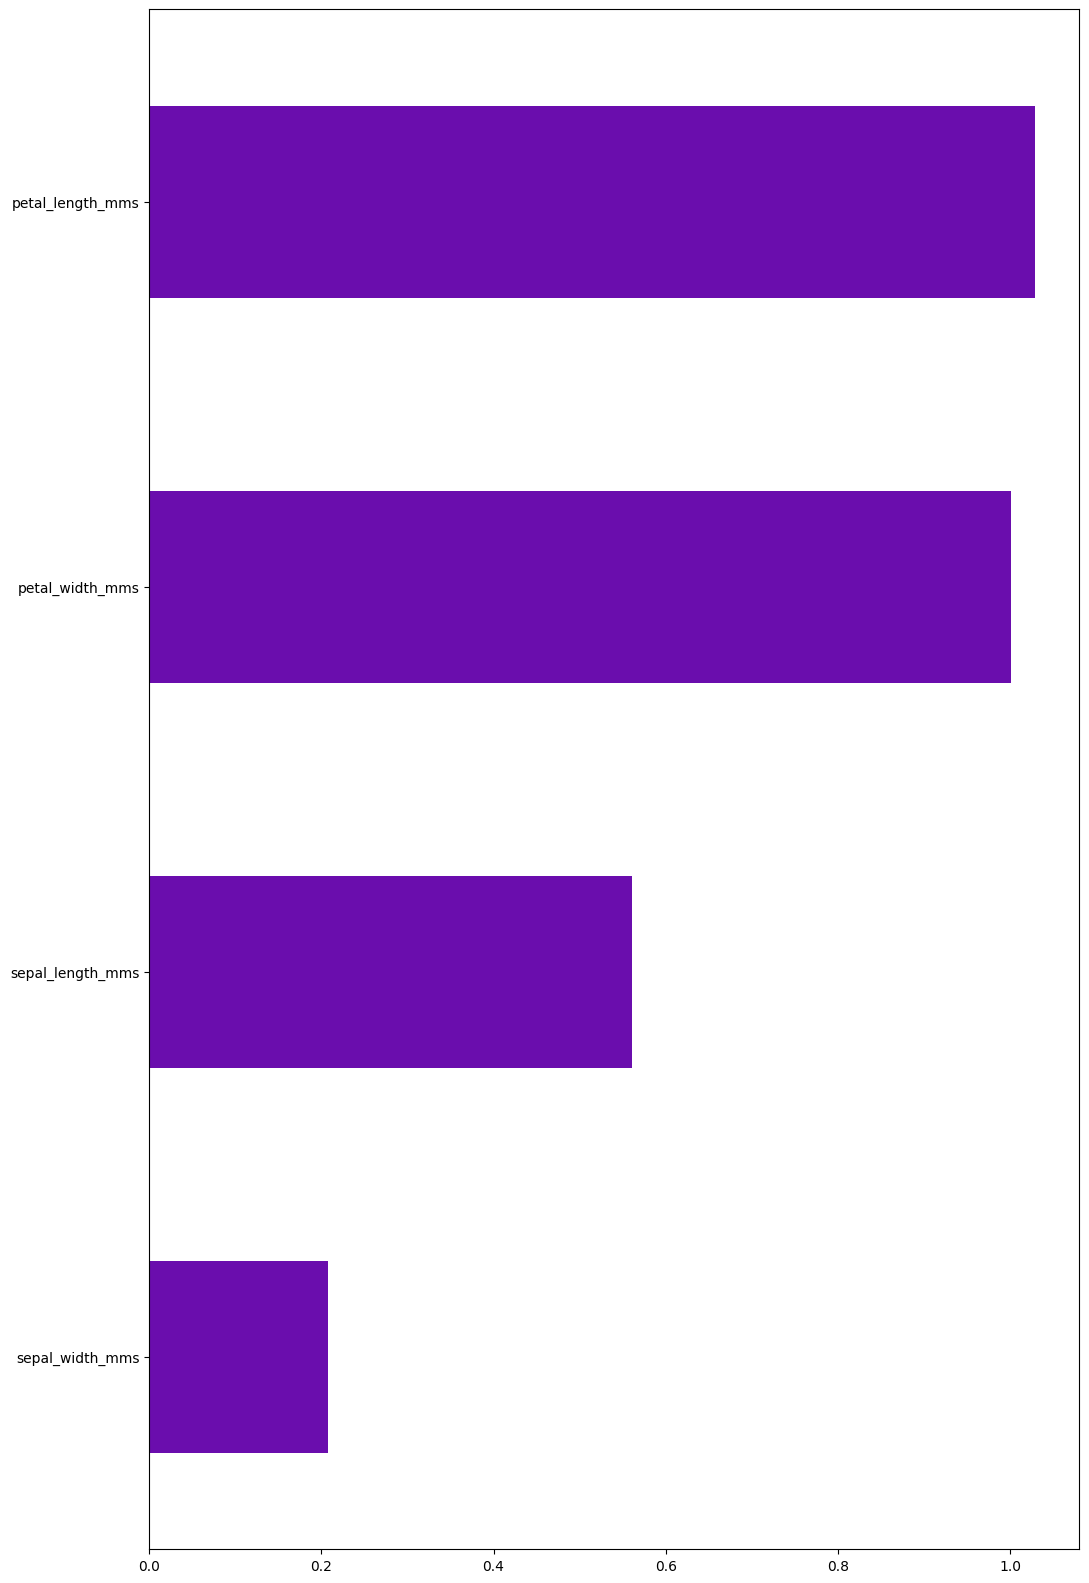

In [55]:

mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

In [57]:
x.to_pickle(ruta_outputs + 'x_final')
y.to_pickle(ruta_outputs + 'y_final')

# MODELIZACIÓN 🚀

In [58]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
#ME ESTA DANDO ERROR REVISAR #import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

from sklearn.neighbors import KNeighborsClassifier

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

In [59]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size = 0.3)

Vamos a Realizar el método GridSearch con varios modelos de clasificación.

In [60]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [
    {
       'algoritmo': [RandomForestClassifier()],
       'algoritmo__n_jobs': [-1],
       'algoritmo__max_depth': [5,10,15],
       'algoritmo__n_estimators': [50,100,200]},
    {'algoritmo': [XGBClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],#para que no salgan warnings
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]},
    {'algoritmo': [HistGradientBoostingClassifier()],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__min_samples_leaf': [500],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]},
    {'algoritmo': [KNeighborsClassifier()],
     'algoritmo__n_neighbors': [3,6,9,12,15,18,21],
     'algoritmo__n_jobs': [-1]}
]

In [61]:
grid_search = GridSearchCV(estimator= pipe, 
                            param_grid = grid, 
                            cv = 3, 
                            scoring = 'roc_auc_ovo',
                            verbose = 0,
                            n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__max_depth,param_algoritmo__n_estimators,param_algoritmo__n_jobs,param_algoritmo__learning_rate,param_algoritmo__reg_alpha,...,param_algoritmo__max_iter,param_algoritmo__min_samples_leaf,param_algoritmo__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
621,0.00,0.00,0.03,0.00,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)",NaN,NaN,-1,NaN,NaN,...,NaN,NaN,3,"{'algoritmo': KNeighborsClassifier(n_jobs=-1, ...",1.00,1.00,1.00,1.00,0.00,1
3,0.20,0.01,0.05,0.01,RandomForestClassifier(),10,50,-1,NaN,NaN,...,NaN,NaN,NaN,"{'algoritmo': RandomForestClassifier(), 'algor...",0.99,1.00,1.00,1.00,0.00,2
6,0.22,0.03,0.04,0.00,RandomForestClassifier(),15,50,-1,NaN,NaN,...,NaN,NaN,NaN,"{'algoritmo': RandomForestClassifier(), 'algor...",0.99,1.00,1.00,1.00,0.00,2
7,0.41,0.02,0.07,0.02,RandomForestClassifier(),15,100,-1,NaN,NaN,...,NaN,NaN,NaN,"{'algoritmo': RandomForestClassifier(), 'algor...",0.99,1.00,1.00,1.00,0.00,2
623,0.01,0.00,0.03,0.00,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)",NaN,NaN,-1,NaN,NaN,...,NaN,NaN,9,"{'algoritmo': KNeighborsClassifier(n_jobs=-1, ...",0.99,1.00,1.00,1.00,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,0.05,0.00,0.01,0.00,HistGradientBoostingClassifier(),20,NaN,NaN,0.10,NaN,...,50,500,NaN,{'algoritmo': HistGradientBoostingClassifier()...,0.50,0.50,0.50,0.50,0.00,449
511,0.09,0.00,0.02,0.00,HistGradientBoostingClassifier(),20,NaN,NaN,0.10,NaN,...,100,500,NaN,{'algoritmo': HistGradientBoostingClassifier()...,0.50,0.50,0.50,0.50,0.00,449
512,0.17,0.00,0.03,0.00,HistGradientBoostingClassifier(),20,NaN,NaN,0.10,NaN,...,200,500,NaN,{'algoritmo': HistGradientBoostingClassifier()...,0.50,0.50,0.50,0.50,0.00,449
514,0.09,0.00,0.02,0.00,HistGradientBoostingClassifier(),5,NaN,NaN,0.01,NaN,...,100,500,NaN,{'algoritmo': HistGradientBoostingClassifier()...,0.50,0.50,0.50,0.50,0.00,449


In [62]:
#Mejor modelo:
mejor_modelo = modelo.best_estimator_
modelo.best_estimator_

Pipeline(steps=[('algoritmo', KNeighborsClassifier(n_jobs=-1, n_neighbors=3))])

In [63]:
#Predecimos
pred = modelo.best_estimator_.predict_proba(val_x)
pred

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.

He generado una matriz con las probabilidades para cada una de las tres clases de Iris:

0- Iris-setosa

1- Iris-versicolor

2- Iris-virginica


Cada fila idica la probabilidad asiganada a cada tipo de Iris según los valores de las variables correspondientes a cada caso.

Observamos que se diferencian perfectamente.
Estando el Iris tipo 0 definido con mucha más claridad. 

In [64]:
roc_auc = roc_auc_score(val_y, pred, multi_class='ovo')
roc_auc

1.0

In [108]:
from IPython.core.display import HTML

roc_auc = 1.0  # El valor de roc_auc
# Usamos HTML para resaltar el valor
html_str = f'<div style="background-color: purple; padding: 10px; border-radius: 5px; font-size: 20px;">ROC AUC Score: {roc_auc}</div>'
display(HTML(html_str))

Hemos calculado el AUC-ROC (enfoque OvO para multiclase) y nos da un valor de casi 1, lo que indica que nuestro modelo de clasificación asigna la probabilidad más alta a la clase correcta en todos o casi todos los casos del dataset de validadción analizados.

In [65]:
#Mostramos directamente el valor final de la predicción.
pred_y = np.argmax(pred,axis=1)
pred_y

array([1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0])

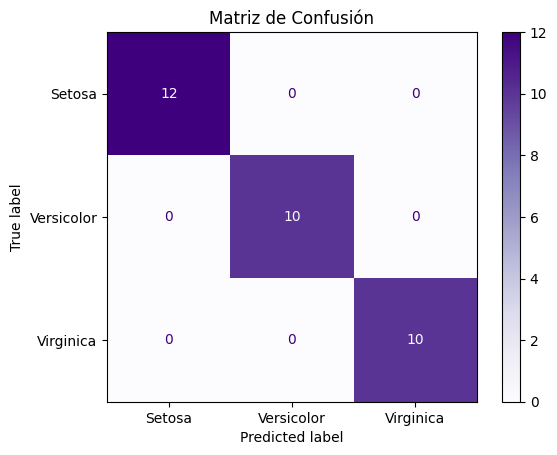

In [66]:
#Matriz de confusión

cm = confusion_matrix(val_y, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa', 'Versicolor', 'Virginica'])
disp.plot(cmap='Purples')
plt.title("Matriz de Confusión")
plt.show()


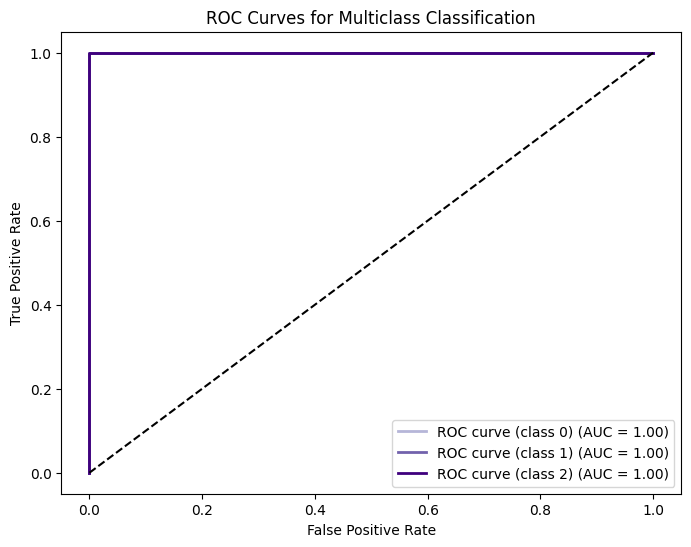

In [67]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from itertools import cycle

val_y
y_bin = label_binarize(val_y,classes = [0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot each ROC curve
colors = cycle(plt.cm.Purples(np.linspace(0.4, 1, 3)))

plt.figure(figsize=(8, 6))
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (class %d) (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc="best")
plt.show()


Vemos un ligerísimo desvío en la predicción correspondiente a las predicciones de las clase 1 y 2. Podríamos decir que el modelo tiene una capacidad predictiva casi perfecta con respecto alos datos de validación aportados.

# CODIGO PRODUCCIÓN

In [75]:
#importaciones:
import cloudpickle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

#Proceso con codigo (modificar origen datos df a cada caso):

datos = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
ruta_outputs= "/kaggle/working/"
val = datos.sample(frac = 0.3)
trabajo = datos.loc[~datos.index.isin(val.index)]
val.to_csv(ruta_outputs + "Validacion.csv")
trabajo.to_csv(ruta_outputs + "Trabajo.csv")
df = pd.read_csv(ruta_outputs + "Trabajo.csv",index_col=0)
#Calidad de datos:
df.drop_duplicates(inplace = True)
df.dropna(thresh=3, inplace=True)
x = df.drop(columns='species').copy()


#Label concoder:
le = LabelEncoder()
le.fit(df['species'])
df['target'] = le.transform(df['species'])

y = df['target'].copy()

#proceso con pipeline:
    #reescalado de varaibles
var_mms = list(x.columns)
mms = MinMaxScaler()
ct = make_column_transformer(
    (mms, var_mms),
    remainder='drop')
     #modelo seleeccionado en gridsearch
modelo = KNeighborsClassifier(n_jobs = -1,n_neighbors = 3)

#Creamos y guardamos pipeline entrenamiento
pipe_entrenamiento = make_pipeline(ct,modelo)

with open(ruta_outputs + 'pipe_entrenamiento.pickle',mode = 'wb') as file:
    cloudpickle.dump(pipe_entrenamiento , file)
    


#Creamos y guardamos pipeline de ejecucion (pipe_entrenamiento entrenado):
pipe_ejecucion = pipe_entrenamiento.fit(x,y)


with open(ruta_outputs + 'pipe_ejecucion.pickle',mode = 'wb') as file:
    cloudpickle.dump(pipe_entrenamiento , file)



# EJEMPLO DE USO - Código producción

Usamos el dataset de validacion que separamos al inicio del notebook para probar nuestro modelo.

In [78]:
import cloudpickle
import pandas as pd

ruta_outputs= "/kaggle/working/"
df = pd.read_csv(ruta_outputs + "Validacion.csv",index_col=0)

#Calidad de datos:
df.drop_duplicates(inplace = True)
df.dropna(thresh=3, inplace=True)
df = df.drop(columns='species').copy()

with open(ruta_outputs + 'pipe_ejecucion.pickle',mode = 'rb') as file:
    pipe_ejecucion = cloudpickle.load(file)

scoring = pipe_ejecucion.predict_proba(df)
scoring


array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.

In [100]:
df_y = pd.read_csv(ruta_outputs + "Validacion.csv",index_col=0)
#df_y = df_y[['species']]
df_y

,sepal_length,sepal_width,petal_length,petal_width,species
71,6.10,2.80,4.00,1.30,Iris-versicolor
39,5.10,3.40,1.50,0.20,Iris-setosa
91,6.10,3.00,4.60,1.40,Iris-versicolor
21,5.10,3.70,1.50,0.40,Iris-setosa
56,6.30,3.30,4.70,1.60,Iris-versicolor
126,6.20,2.80,4.80,1.80,Iris-virginica
106,4.90,2.50,4.50,1.70,Iris-virginica
90,5.50,2.60,4.40,1.20,Iris-versicolor
57,4.90,2.40,3.30,1.00,Iris-versicolor
113,5.70,2.50,5.00,2.00,Iris-virginica


In [101]:
mapping = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df_y['species_num'] = df_y['species'].map(mapping)
df_y

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
71,6.10,2.80,4.00,1.30,Iris-versicolor,1
39,5.10,3.40,1.50,0.20,Iris-setosa,0
91,6.10,3.00,4.60,1.40,Iris-versicolor,1
21,5.10,3.70,1.50,0.40,Iris-setosa,0
56,6.30,3.30,4.70,1.60,Iris-versicolor,1
126,6.20,2.80,4.80,1.80,Iris-virginica,2
106,4.90,2.50,4.50,1.70,Iris-virginica,2
90,5.50,2.60,4.40,1.20,Iris-versicolor,1
57,4.90,2.40,3.30,1.00,Iris-versicolor,1
113,5.70,2.50,5.00,2.00,Iris-virginica,2


In [102]:
roc_auc = roc_auc_score(df_y['species_num'], scoring, multi_class='ovo')
roc_auc

0.9806547619047619

In [107]:
from IPython.core.display import HTML

roc_auc = 0.9806547619047619  # El valor de roc_auc
# Usamos HTML para resaltar el valor
html_str = f'<div style="background-color: purple; padding: 10px; border-radius: 5px; font-size: 20px;">ROC AUC Score: {roc_auc}</div>'
display(HTML(html_str))

In [103]:
scoring_unificado = np.argmax(scoring,axis = 1)
scoring_unificado

array([1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1,
       1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 2, 1,
       2])

In [104]:
df_y['predicción'] = scoring_unificado

Visualizamos los datos originales junto con la columna de predicción resaltando aquellos casos en los que la predicción del modelo ha fallado.

In [105]:
def highlight(row):
    if row['species_num'] != row['predicción']:
        return ['background-color: lightcoral'] * len(row)
    else:
        return ['background-colo: none'] * len(row)

# Aplicar el estilo al DataFrame
df_styled = df_y.style.apply(highlight, axis=1)

# Mostrar el DataFrame con estilo
df_styled

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,predicción
71,6.100000,2.800000,4.000000,1.300000,Iris-versicolor,1,1
39,5.100000,3.400000,1.500000,0.200000,Iris-setosa,0,0
91,6.100000,3.000000,4.600000,1.400000,Iris-versicolor,1,1
21,5.100000,3.700000,1.500000,0.400000,Iris-setosa,0,0
56,6.300000,3.300000,4.700000,1.600000,Iris-versicolor,1,1
126,6.200000,2.800000,4.800000,1.800000,Iris-virginica,2,2
106,4.900000,2.500000,4.500000,1.700000,Iris-virginica,2,1
90,5.500000,2.600000,4.400000,1.200000,Iris-versicolor,1,1
57,4.900000,2.400000,3.300000,1.000000,Iris-versicolor,1,1
113,5.700000,2.500000,5.000000,2.000000,Iris-virginica,2,2
